In [1]:
# Parameters
global_seed = 88
save_results = False
benchmark_settings = {"benchmark_name": "pMNIST", "difficulty": "standard", "num_tasks": 5, "train_percentage": 0.4, "num_val_benchmarks": 3, "batch_size": 128}
method_settings = {"method_name": "GroHess", "grow_from": "output", "hessian_percentile": 95, "grad_percentile": 95, "num_inputs": 784, "num_hidden_root": 100, "num_outputs": 10, "loss_name": "CE", "optimizer_name": "Adam"}
HPO_settings = {"HPO_name": "greedy_HPO", "n_trials": 10, "lr": [5e-05, 0.002], "num_epochs": [2, 6]}
visualization_settings = {"savefig": True, "visualize_accs_matrix": False, "visualize_avg_acc_curve": False, "visualize_best_params": False, "visualize_val_accs_matrix": True, "visualize_accuracy_through_benchmarks": False, "visualize_violin": False}


In [2]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.1,
                      "num_val_benchmarks" : 3,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "GroHess",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 100,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 2,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (2, 4)}

# Parameters specific to the visualization
visualization_settings = {"savefig" : True,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True,
                          "visualize_violin" : True}

In [3]:
print("#########################################")
print(type(HPO_settings["lr"][0]))
print("#########################################")

#########################################
<class 'float'>
#########################################


In [4]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib/benchmark_loaders")

path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [5]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation

In [6]:
device = get_device(1)

## Get benchmarks

In [7]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [8]:
test_accs_matrix, best_params_list, model = run_HPO(HPO_settings, method_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-05 15:08:22,123] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

 25%|████████████████████████████▊                                                                                      | 1/4 [00:02<00:08,  2.85s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:05<00:05,  2.75s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:08<00:02,  2.73s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.71s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.73s/it]

[I 2024-07-05 15:08:36,702] Trial 0 finished with value: 94.08099644128114 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 94.08099644128114.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:13,  2.69s/it]

 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.69s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:08<00:08,  2.69s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.69s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:13<00:02,  2.69s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:16<00:00,  2.69s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:16<00:00,  2.69s/it]

[I 2024-07-05 15:08:56,477] Trial 1 finished with value: 94.77562277580078 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 94.77562277580078.


  0%|                                                                                                                           | 0/5 [00:00<?, ?it/s]

 20%|███████████████████████                                                                                            | 1/5 [00:02<00:10,  2.68s/it]

 40%|██████████████████████████████████████████████                                                                     | 2/5 [00:05<00:08,  2.69s/it]

 60%|█████████████████████████████████████████████████████████████████████                                              | 3/5 [00:08<00:05,  2.69s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 4/5 [00:10<00:02,  2.64s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:13<00:00,  2.62s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:13<00:00,  2.64s/it]

[I 2024-07-05 15:09:13,306] Trial 2 finished with value: 94.67572953736666 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 1 with value: 94.77562277580078.


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:02<00:05,  2.56s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:05<00:02,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.56s/it]

[I 2024-07-05 15:09:24,621] Trial 3 finished with value: 93.58309608540921 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 1 with value: 94.77562277580078.


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

 25%|████████████████████████████▊                                                                                      | 1/4 [00:02<00:07,  2.55s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:05<00:05,  2.56s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:07<00:02,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.56s/it]

[I 2024-07-05 15:09:38,487] Trial 4 finished with value: 91.09160142348749 and parameters: {'lr': 0.00039155132048184497, 'num_epochs': 4}. Best is trial 1 with value: 94.77562277580078.


  0%|                                                                                                                           | 0/2 [00:00<?, ?it/s]

 50%|█████████████████████████████████████████████████████████▌                                                         | 1/2 [00:02<00:02,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.56s/it]

[I 2024-07-05 15:09:47,241] Trial 5 finished with value: 93.15480427046258 and parameters: {'lr': 0.0018610399415001965, 'num_epochs': 2}. Best is trial 1 with value: 94.77562277580078.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.56s/it]

 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.56s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.56s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.56s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.56s/it]

[I 2024-07-05 15:10:06,242] Trial 6 finished with value: 90.37128113879 and parameters: {'lr': 0.00022534827963370947, 'num_epochs': 6}. Best is trial 1 with value: 94.77562277580078.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.56s/it]

 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.56s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.56s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.56s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.56s/it]

[I 2024-07-05 15:10:25,234] Trial 7 finished with value: 94.65622775800726 and parameters: {'lr': 0.0009969610648453769, 'num_epochs': 6}. Best is trial 1 with value: 94.77562277580078.


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:02<00:05,  2.56s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:05<00:02,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.55s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.56s/it]

[I 2024-07-05 15:10:36,537] Trial 8 finished with value: 91.6757651245551 and parameters: {'lr': 0.0006493011807870831, 'num_epochs': 3}. Best is trial 1 with value: 94.77562277580078.


  0%|                                                                                                                           | 0/2 [00:00<?, ?it/s]

 50%|█████████████████████████████████████████████████████████▌                                                         | 1/2 [00:02<00:02,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.56s/it]

[I 2024-07-05 15:10:45,290] Trial 9 finished with value: 92.1566903914591 and parameters: {'lr': 0.0011838191987348487, 'num_epochs': 2}. Best is trial 1 with value: 94.77562277580078.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.56s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.56s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.56s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.56s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.56s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.56s/it]

[I 2024-07-05 15:11:05,685] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

 25%|████████████████████████████▊                                                                                      | 1/4 [00:02<00:07,  2.56s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:05<00:05,  2.57s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:07<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]

[I 2024-07-05 15:11:23,237] Trial 0 finished with value: 93.32434163701066 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 93.32434163701066.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.57s/it]

 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.57s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.61s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.59s/it]

[I 2024-07-05 15:11:46,076] Trial 1 finished with value: 93.42192170818504 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 93.42192170818504.


  0%|                                                                                                                           | 0/5 [00:00<?, ?it/s]

 20%|███████████████████████                                                                                            | 1/5 [00:02<00:10,  2.57s/it]

 40%|██████████████████████████████████████████████                                                                     | 2/5 [00:05<00:07,  2.57s/it]

 60%|█████████████████████████████████████████████████████████████████████                                              | 3/5 [00:07<00:05,  2.57s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 4/5 [00:10<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.57s/it]

[I 2024-07-05 15:12:06,217] Trial 2 finished with value: 93.32448398576516 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 1 with value: 93.42192170818504.


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:02<00:05,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:05<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

[I 2024-07-05 15:12:21,219] Trial 3 finished with value: 93.337153024911 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 1 with value: 93.42192170818504.


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

 25%|████████████████████████████▊                                                                                      | 1/4 [00:02<00:07,  2.57s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:05<00:05,  2.58s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:07<00:02,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]

[I 2024-07-05 15:12:38,816] Trial 4 finished with value: 92.78234875444838 and parameters: {'lr': 0.00039155132048184497, 'num_epochs': 4}. Best is trial 1 with value: 93.42192170818504.


  0%|                                                                                                                           | 0/2 [00:00<?, ?it/s]

 50%|█████████████████████████████████████████████████████████▌                                                         | 1/2 [00:02<00:02,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.57s/it]

[I 2024-07-05 15:12:51,240] Trial 5 finished with value: 92.97540925266904 and parameters: {'lr': 0.0018610399415001965, 'num_epochs': 2}. Best is trial 1 with value: 93.42192170818504.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.57s/it]

 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.57s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

[I 2024-07-05 15:13:13,939] Trial 6 finished with value: 92.30277580071166 and parameters: {'lr': 0.00022534827963370947, 'num_epochs': 6}. Best is trial 1 with value: 93.42192170818504.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.56s/it]

 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.56s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.56s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.56s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

[I 2024-07-05 15:13:36,611] Trial 7 finished with value: 93.54701067615659 and parameters: {'lr': 0.0009969610648453769, 'num_epochs': 6}. Best is trial 7 with value: 93.54701067615659.


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:02<00:05,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:05<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

[I 2024-07-05 15:13:51,598] Trial 8 finished with value: 93.02434163701061 and parameters: {'lr': 0.0006493011807870831, 'num_epochs': 3}. Best is trial 7 with value: 93.54701067615659.


  0%|                                                                                                                           | 0/2 [00:00<?, ?it/s]

 50%|█████████████████████████████████████████████████████████▌                                                         | 1/2 [00:02<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.57s/it]

[I 2024-07-05 15:14:04,031] Trial 9 finished with value: 93.10482206405696 and parameters: {'lr': 0.0011838191987348487, 'num_epochs': 2}. Best is trial 7 with value: 93.54701067615659.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 121
fc2 : in = 121, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.58s/it]

[I 2024-07-05 15:14:24,509] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

 25%|████████████████████████████▊                                                                                      | 1/4 [00:02<00:07,  2.57s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:05<00:05,  2.58s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:07<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.58s/it]

[I 2024-07-05 15:14:45,746] Trial 0 finished with value: 90.32565836298933 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 90.32565836298933.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.57s/it]

 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.58s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.58s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

[I 2024-07-05 15:15:12,103] Trial 1 finished with value: 87.62241992882565 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 0 with value: 90.32565836298933.


  0%|                                                                                                                           | 0/5 [00:00<?, ?it/s]

 20%|███████████████████████                                                                                            | 1/5 [00:02<00:10,  2.57s/it]

 40%|██████████████████████████████████████████████                                                                     | 2/5 [00:05<00:07,  2.57s/it]

 60%|█████████████████████████████████████████████████████████████████████                                              | 3/5 [00:07<00:05,  2.57s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 4/5 [00:10<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.57s/it]

[I 2024-07-05 15:15:35,876] Trial 2 finished with value: 88.8920047449585 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 0 with value: 90.32565836298933.


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:02<00:05,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:05<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

[I 2024-07-05 15:15:54,495] Trial 3 finished with value: 89.28488730723605 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 0 with value: 90.32565836298933.


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

 25%|████████████████████████████▊                                                                                      | 1/4 [00:02<00:07,  2.57s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:05<00:05,  2.58s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:07<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]

[I 2024-07-05 15:16:15,675] Trial 4 finished with value: 90.36727164887309 and parameters: {'lr': 0.00039155132048184497, 'num_epochs': 4}. Best is trial 4 with value: 90.36727164887309.


  0%|                                                                                                                           | 0/2 [00:00<?, ?it/s]

 50%|█████████████████████████████████████████████████████████▌                                                         | 1/2 [00:02<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.57s/it]

[I 2024-07-05 15:16:31,732] Trial 5 finished with value: 88.43988137603795 and parameters: {'lr': 0.0018610399415001965, 'num_epochs': 2}. Best is trial 4 with value: 90.36727164887309.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.57s/it]

 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.57s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

[I 2024-07-05 15:16:58,081] Trial 6 finished with value: 90.54135231316724 and parameters: {'lr': 0.00022534827963370947, 'num_epochs': 6}. Best is trial 6 with value: 90.54135231316724.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.58s/it]

 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.58s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

[I 2024-07-05 15:17:24,441] Trial 7 finished with value: 88.7361328588375 and parameters: {'lr': 0.0009969610648453769, 'num_epochs': 6}. Best is trial 6 with value: 90.54135231316724.


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:02<00:05,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:05<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

[I 2024-07-05 15:17:43,082] Trial 8 finished with value: 91.38109134045078 and parameters: {'lr': 0.0006493011807870831, 'num_epochs': 3}. Best is trial 8 with value: 91.38109134045078.


  0%|                                                                                                                           | 0/2 [00:00<?, ?it/s]

 50%|█████████████████████████████████████████████████████████▌                                                         | 1/2 [00:02<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.57s/it]

[I 2024-07-05 15:17:59,171] Trial 9 finished with value: 89.58043890865953 and parameters: {'lr': 0.0011838191987348487, 'num_epochs': 2}. Best is trial 8 with value: 91.38109134045078.


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 121
fc2 : in = 121, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:02<00:05,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 121
fc2 : in = 121, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:05<00:02,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 156
fc2 : in = 156, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.58s/it]

[I 2024-07-05 15:18:11,927] A new study created in memory with name: Search number 4



--------------------------------------------------
LEARNING TASK 4


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

 25%|████████████████████████████▊                                                                                      | 1/4 [00:02<00:07,  2.58s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:05<00:05,  2.57s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:07<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]

[I 2024-07-05 15:18:36,744] Trial 0 finished with value: 85.70190391459074 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 85.70190391459074.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.57s/it]

 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.57s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

[I 2024-07-05 15:19:06,711] Trial 1 finished with value: 84.27898576512459 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 0 with value: 85.70190391459074.


  0%|                                                                                                                           | 0/5 [00:00<?, ?it/s]

 20%|███████████████████████                                                                                            | 1/5 [00:02<00:10,  2.57s/it]

 40%|██████████████████████████████████████████████                                                                     | 2/5 [00:05<00:07,  2.57s/it]

 60%|█████████████████████████████████████████████████████████████████████                                              | 3/5 [00:07<00:05,  2.57s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 4/5 [00:10<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.57s/it]

[I 2024-07-05 15:19:34,102] Trial 2 finished with value: 83.0481494661922 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 0 with value: 85.70190391459074.


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:02<00:05,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:05<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

[I 2024-07-05 15:19:56,374] Trial 3 finished with value: 85.5775800711744 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 0 with value: 85.70190391459074.


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

 25%|████████████████████████████▊                                                                                      | 1/4 [00:02<00:07,  2.57s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:05<00:05,  2.57s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:07<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]

[I 2024-07-05 15:20:21,205] Trial 4 finished with value: 89.42866548042703 and parameters: {'lr': 0.00039155132048184497, 'num_epochs': 4}. Best is trial 4 with value: 89.42866548042703.


  0%|                                                                                                                           | 0/2 [00:00<?, ?it/s]

 50%|█████████████████████████████████████████████████████████▌                                                         | 1/2 [00:02<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.57s/it]

[I 2024-07-05 15:20:40,909] Trial 5 finished with value: 86.16274021352315 and parameters: {'lr': 0.0018610399415001965, 'num_epochs': 2}. Best is trial 4 with value: 89.42866548042703.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.58s/it]

 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.57s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

[I 2024-07-05 15:21:10,896] Trial 6 finished with value: 88.85663701067617 and parameters: {'lr': 0.00022534827963370947, 'num_epochs': 6}. Best is trial 4 with value: 89.42866548042703.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.57s/it]

 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.57s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

[I 2024-07-05 15:21:40,868] Trial 7 finished with value: 88.39247330960849 and parameters: {'lr': 0.0009969610648453769, 'num_epochs': 6}. Best is trial 4 with value: 89.42866548042703.


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:02<00:05,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:05<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

[I 2024-07-05 15:22:03,142] Trial 8 finished with value: 88.42864768683273 and parameters: {'lr': 0.0006493011807870831, 'num_epochs': 3}. Best is trial 4 with value: 89.42866548042703.


  0%|                                                                                                                           | 0/2 [00:00<?, ?it/s]

 50%|█████████████████████████████████████████████████████████▌                                                         | 1/2 [00:02<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.57s/it]

[I 2024-07-05 15:22:22,805] Trial 9 finished with value: 87.73215302491104 and parameters: {'lr': 0.0011838191987348487, 'num_epochs': 2}. Best is trial 4 with value: 89.42866548042703.


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 156
fc2 : in = 156, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:02<00:07,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 156
fc2 : in = 156, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:05<00:05,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 156
fc2 : in = 156, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:07<00:02,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 156
fc2 : in = 156, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.58s/it]

[I 2024-07-05 15:22:38,141] A new study created in memory with name: Search number 5



--------------------------------------------------
LEARNING TASK 5


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

 25%|████████████████████████████▊                                                                                      | 1/4 [00:02<00:07,  2.58s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:05<00:05,  2.58s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:07<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]

[I 2024-07-05 15:23:06,609] Trial 0 finished with value: 81.41360854092527 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 81.41360854092527.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.58s/it]

 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.58s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

[I 2024-07-05 15:23:40,241] Trial 1 finished with value: 82.68674021352317 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 82.68674021352317.


  0%|                                                                                                                           | 0/5 [00:00<?, ?it/s]

 20%|███████████████████████                                                                                            | 1/5 [00:02<00:10,  2.57s/it]

 40%|██████████████████████████████████████████████                                                                     | 2/5 [00:05<00:07,  2.57s/it]

 60%|█████████████████████████████████████████████████████████████████████                                              | 3/5 [00:07<00:05,  2.57s/it]

 80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 4/5 [00:10<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.57s/it]

[I 2024-07-05 15:24:11,245] Trial 2 finished with value: 80.22402846975092 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 1 with value: 82.68674021352317.


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:02<00:05,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:05<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

[I 2024-07-05 15:24:37,162] Trial 3 finished with value: 81.67909608540926 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 1 with value: 82.68674021352317.


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

 25%|████████████████████████████▊                                                                                      | 1/4 [00:02<00:07,  2.57s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:05<00:05,  2.57s/it]

 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:07<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.57s/it]

[I 2024-07-05 15:25:05,610] Trial 4 finished with value: 86.30233451957295 and parameters: {'lr': 0.00039155132048184497, 'num_epochs': 4}. Best is trial 4 with value: 86.30233451957295.


  0%|                                                                                                                           | 0/2 [00:00<?, ?it/s]

 50%|█████████████████████████████████████████████████████████▌                                                         | 1/2 [00:02<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.58s/it]

[I 2024-07-05 15:25:28,961] Trial 5 finished with value: 79.73627758007119 and parameters: {'lr': 0.0018610399415001965, 'num_epochs': 2}. Best is trial 4 with value: 86.30233451957295.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.57s/it]

 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.57s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

[I 2024-07-05 15:26:02,522] Trial 6 finished with value: 86.89100355871888 and parameters: {'lr': 0.00022534827963370947, 'num_epochs': 6}. Best is trial 6 with value: 86.89100355871888.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.57s/it]

 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.57s/it]

 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.57s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

[I 2024-07-05 15:26:36,174] Trial 7 finished with value: 83.73788612099648 and parameters: {'lr': 0.0009969610648453769, 'num_epochs': 6}. Best is trial 6 with value: 86.89100355871888.


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:02<00:05,  2.58s/it]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:05<00:02,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.57s/it]

[I 2024-07-05 15:27:02,074] Trial 8 finished with value: 85.94281138790035 and parameters: {'lr': 0.0006493011807870831, 'num_epochs': 3}. Best is trial 6 with value: 86.89100355871888.


  0%|                                                                                                                           | 0/2 [00:00<?, ?it/s]

 50%|█████████████████████████████████████████████████████████▌                                                         | 1/2 [00:02<00:02,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.56s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.56s/it]

[I 2024-07-05 15:27:25,376] Trial 9 finished with value: 84.39015658362987 and parameters: {'lr': 0.0011838191987348487, 'num_epochs': 2}. Best is trial 6 with value: 86.89100355871888.


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 227
fc2 : in = 227, out = 100
fc3 : in = 100, out = 10


 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 227
fc2 : in = 227, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 341
fc2 : in = 341, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 341
fc2 : in = 341, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 341
fc2 : in = 341, out = 100
fc3 : in = 100, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 341
fc2 : in = 341, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.58s/it]

## Visualize results

In [9]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [10]:
val_accs_matrix = validate(benchmarks_list, method_settings, best_params_list, device, global_seed)


BENCHMARK 0

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.58s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:02<00:05,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:05<00:02,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 143
fc2 : in = 143, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.58s/it]


--------------------------------------------------
LEARNING TASK 4


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 143
fc2 : in = 143, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:02<00:07,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 143
fc2 : in = 143, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:05<00:05,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 143
fc2 : in = 143, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:07<00:02,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 190
fc2 : in = 190, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.59s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.59s/it]


--------------------------------------------------
LEARNING TASK 5


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 190
fc2 : in = 190, out = 100
fc3 : in = 100, out = 10


 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 190
fc2 : in = 190, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 190
fc2 : in = 190, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 190
fc2 : in = 190, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 190
fc2 : in = 190, out = 100
fc3 : in = 100, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 195
fc2 : in = 195, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.59s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.59s/it]


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 130
fc2 : in = 130, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 130
fc2 : in = 130, out = 121
fc3 : in = 121, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 130
fc2 : in = 130, out = 121
fc3 : in = 121, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 185
fc2 : in = 185, out = 166
fc3 : in = 166, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.58s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 185
fc2 : in = 185, out = 166
fc3 : in = 166, out = 10


 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:02<00:05,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 185
fc2 : in = 185, out = 166
fc3 : in = 166, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:05<00:02,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 261
fc2 : in = 261, out = 166
fc3 : in = 166, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.58s/it]


--------------------------------------------------
LEARNING TASK 4


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 261
fc2 : in = 261, out = 166
fc3 : in = 166, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:02<00:07,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 261
fc2 : in = 261, out = 166
fc3 : in = 166, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:05<00:05,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 261
fc2 : in = 261, out = 166
fc3 : in = 166, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:07<00:02,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 261
fc2 : in = 261, out = 166
fc3 : in = 166, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.58s/it]


--------------------------------------------------
LEARNING TASK 5


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 261
fc2 : in = 261, out = 166
fc3 : in = 166, out = 10


 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 261
fc2 : in = 261, out = 166
fc3 : in = 166, out = 10


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 261
fc2 : in = 261, out = 166
fc3 : in = 166, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 382
fc2 : in = 382, out = 166
fc3 : in = 166, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 382
fc2 : in = 382, out = 166
fc3 : in = 166, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 382
fc2 : in = 382, out = 166
fc3 : in = 166, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.59s/it]


BENCHMARK 2

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.58s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:02<00:05,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:05<00:02,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.58s/it]


--------------------------------------------------
LEARNING TASK 4


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:02<00:07,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:05<00:05,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 128
fc2 : in = 128, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:07<00:02,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 128
fc2 : in = 128, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.58s/it]


--------------------------------------------------
LEARNING TASK 5


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 128
fc2 : in = 128, out = 103
fc3 : in = 103, out = 10


 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 128
fc2 : in = 128, out = 103
fc3 : in = 103, out = 10


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 128
fc2 : in = 128, out = 103
fc3 : in = 103, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 128
fc2 : in = 128, out = 103
fc3 : in = 103, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 128
fc2 : in = 128, out = 103
fc3 : in = 103, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 128
fc2 : in = 128, out = 103
fc3 : in = 103, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.58s/it]


BENCHMARK 3

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.56s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:12,  2.57s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 114
fc2 : in = 114, out = 100
fc3 : in = 100, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:12<00:02,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 114
fc2 : in = 114, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.58s/it]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 114
fc2 : in = 114, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:02<00:05,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 114
fc2 : in = 114, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:05<00:02,  2.58s/it]

In and out sizes :
fc1 : in = 784, out = 156
fc2 : in = 156, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.58s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.58s/it]


--------------------------------------------------
LEARNING TASK 4


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 156
fc2 : in = 156, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:02<00:07,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 156
fc2 : in = 156, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:05<00:05,  2.59s/it]

In and out sizes :
fc1 : in = 784, out = 156
fc2 : in = 156, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:07<00:02,  2.64s/it]

In and out sizes :
fc1 : in = 784, out = 156
fc2 : in = 156, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.67s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.65s/it]


--------------------------------------------------
LEARNING TASK 5


  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 156
fc2 : in = 156, out = 100
fc3 : in = 100, out = 10


 17%|███████████████████▏                                                                                               | 1/6 [00:02<00:13,  2.63s/it]

In and out sizes :
fc1 : in = 784, out = 156
fc2 : in = 156, out = 100
fc3 : in = 100, out = 10


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:05<00:10,  2.63s/it]

In and out sizes :
fc1 : in = 784, out = 156
fc2 : in = 156, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 3/6 [00:07<00:07,  2.62s/it]

In and out sizes :
fc1 : in = 784, out = 225
fc2 : in = 225, out = 100
fc3 : in = 100, out = 10


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:10<00:05,  2.61s/it]

In and out sizes :
fc1 : in = 784, out = 225
fc2 : in = 225, out = 100
fc3 : in = 100, out = 10


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 5/6 [00:13<00:02,  2.60s/it]

In and out sizes :
fc1 : in = 784, out = 225
fc2 : in = 225, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.60s/it]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.61s/it]

## Visualize validation

In [11]:
test_accs_matrix

array([[94.84, 14.51,  8.03,  8.55, 11.37],
       [92.04, 95.55,  8.72,  9.34, 13.18],
       [88.9 , 92.37, 93.84,  7.98, 16.07],
       [86.36, 89.07, 90.38, 92.42, 13.79],
       [84.18, 81.97, 88.28, 88.45, 93.12]])

In [12]:
val_accs_matrix

array([[81.01, 87.4 , 89.52, 87.01, 92.3 ],
       [73.45, 76.03, 72.16, 85.44, 93.13],
       [76.94, 82.24, 88.05, 89.8 , 91.84],
       [86.03, 69.18, 75.92, 67.05, 92.96]])

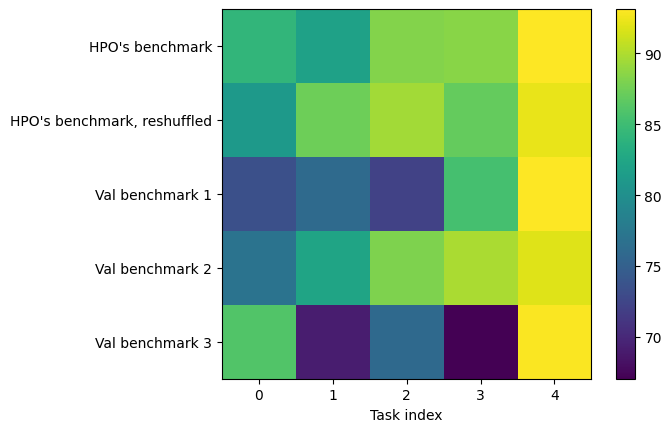

In [13]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [14]:
if save_results :
    np.savetxt('Results/test_accs_matrix.csv', test_accs_matrix)
    np.savetxt('Results/val_accs_matrix.csv', val_accs_matrix)